In [6]:
import numpy as np
import matplotlib.pyplot as plt

import keras 

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_img(i):
    plt.imshow(x_train[i], cmap = 'binary')
    plt.title(y_train[i]) 
    plt.show()

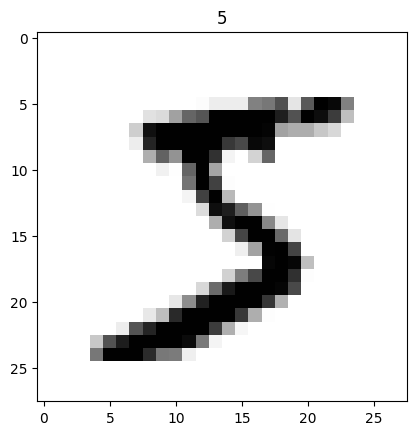

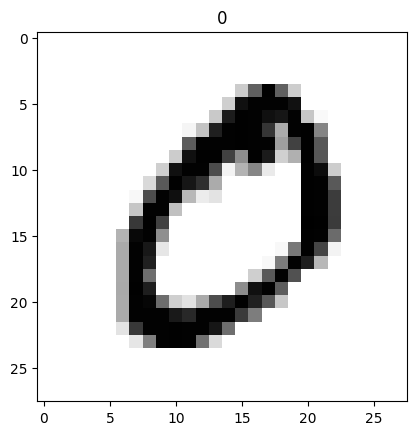

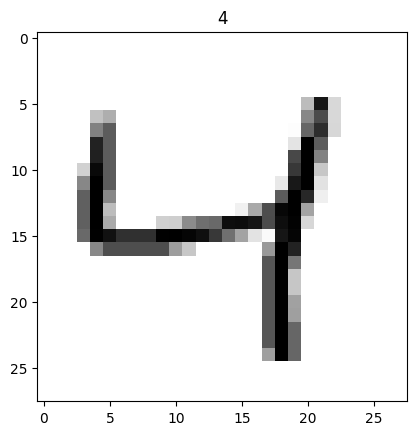

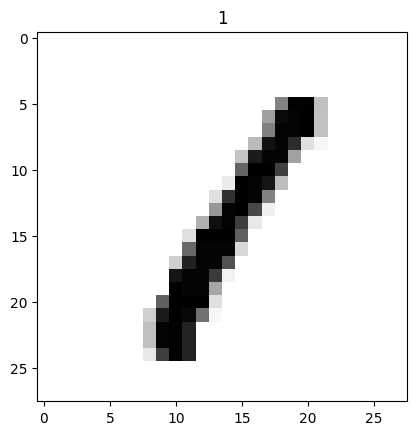

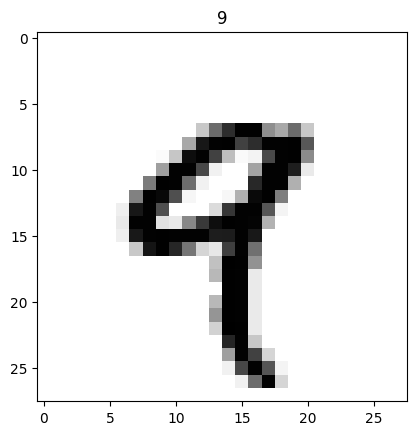

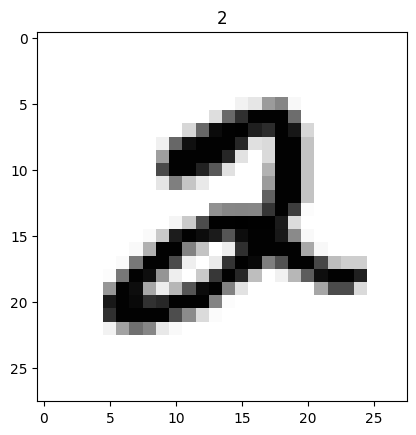

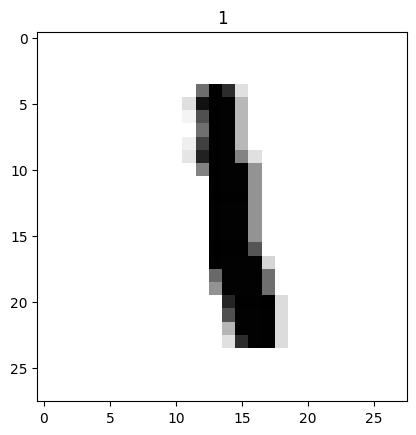

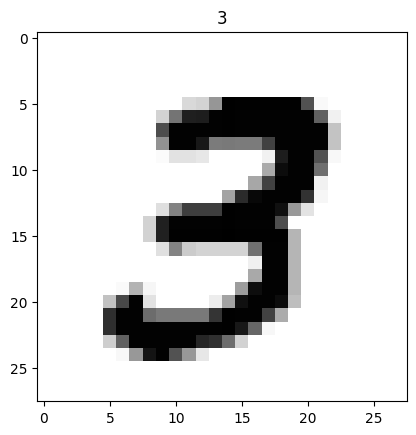

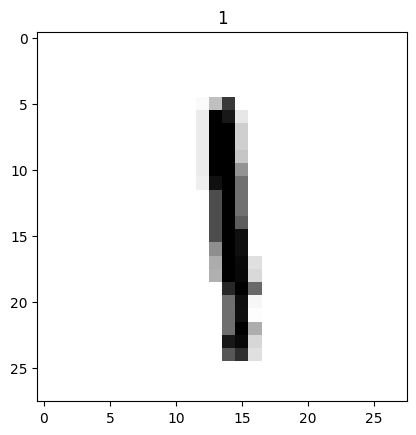

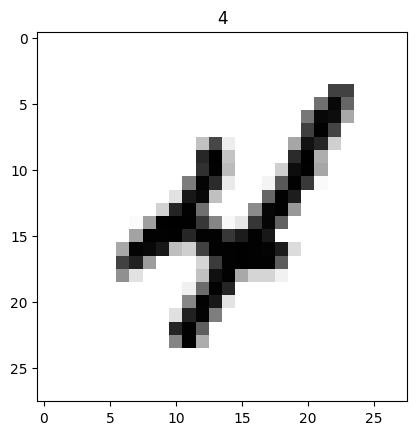

In [4]:
for i in range(10):
    plot_input_img(i)

In [5]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1, mode='max')

# model checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')

cb = [es, mc]




In [33]:
# training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9949 - loss: 0.0158
Epoch 1: val_accuracy improved from -inf to 0.98900, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9890 - val_loss: 0.0425
Epoch 2/5
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9942 - loss: 0.0158
Epoch 2: val_accuracy improved from 0.98900 to 0.98906, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9942 - loss: 0.0158 - val_accuracy: 0.9891 - val_loss: 0.0412
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9950 - loss: 0.0139
Epoch 3: val_accuracy did not improve from 0.98906
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9950 - loss: 0.0139 - val_accuracy: 0.9890 - val_loss: 0.0442
Epoch 4/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9950 - loss: 0.0140
Epoch 4: val_accuracy improved from 0.98906 to 0.98978, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9950 - loss: 0.0140 - val_accuracy: 0.9898 - val_loss: 0.0435
Epoch 5/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9960 - loss: 0.0111
Epoch 5: val_accuracy improved from 0.98978 to 0.99011, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9960 - loss: 0.0111 - val_accuracy: 0.9901 - val_loss: 0.0393
Epoch 5: early stopping


In [35]:
model_S = keras.models.load_model("//Users//apple//Documents//handwritten//bestmodel.h5")

In [36]:
score = model_S.evaluate(x_test, y_test)

print(f"the model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0443
the model accuracy is 0.9908000230789185
